In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [92]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')

/tmp/ipython-input-1710893607.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')


In [86]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [88]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [89]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [94]:
df.drop_duplicates(inplace = True)

df.drop(['house_rules', 'license'],axis=1, inplace = True )

df['price'] = df['price'].str.replace('$','', regex = False)
df['service fee'] = df['service fee'].str.replace('$','', regex = False)

df['price'] = df['price'].str.replace(',','', regex = False)
df['service fee'] = df['service fee'].str.replace(',','', regex = False)

df.rename(columns = {
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace= True)

df.dropna(inplace = True)

df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['Construction year']=df['Construction year'].astype(int)
df['last review']=pd.to_datetime(df['last review'], errors='coerce')


df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

df=df.drop(df[df['availability 365']>500].index)

/tmp/ipython-input-4225562898.py:23: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review']=pd.to_datetime(df['last review'], errors='coerce')


In [95]:
df.duplicated().value_counts()

,count
False,83411


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

In [97]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [98]:
property_type = df['room type'].value_counts().to_frame()
property_type

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

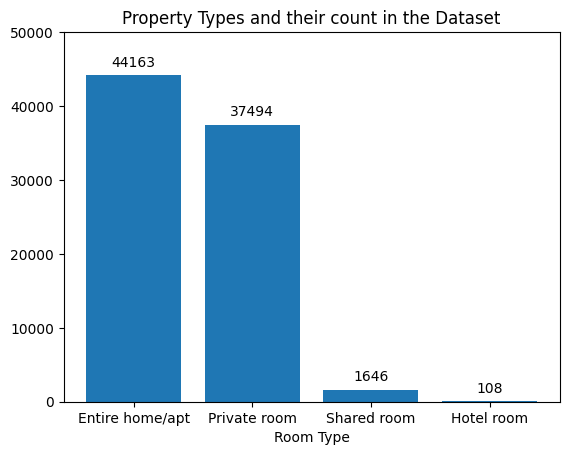

In [99]:
room_type_bar = plt.bar(property_type.index, property_type.loc[:,"count"])
plt.bar_label(room_type_bar, labels = property_type.loc[:,"count"], padding = 4)
plt.ylim([0,50000])
plt.xlabel('Room Type')
plt.ylabel;('Room type count')
plt.title('Property Types and their count in the Dataset')

In [100]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


Text(0.5, 1.0, 'Which Neighbourhood Group has highest number of counts')

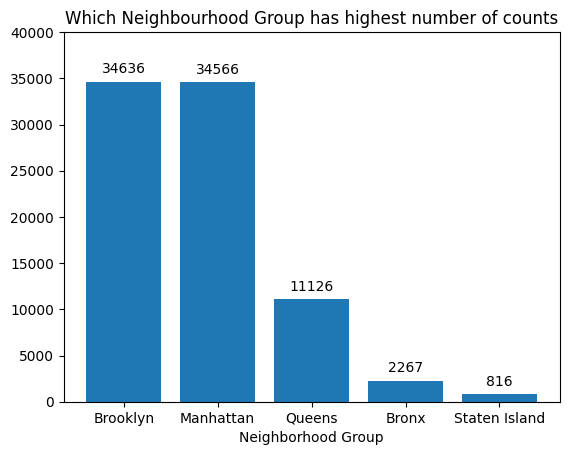

In [101]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"])
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4)
plt.ylim([0,40000])
plt.xlabel('Neighborhood Group')
plt.ylabel;('Neighborhood Group count')
plt.title('Which Neighbourhood Group has highest number of counts')

Text(0.5, 1.0, 'Which Neighbourhood Group has highest average price')

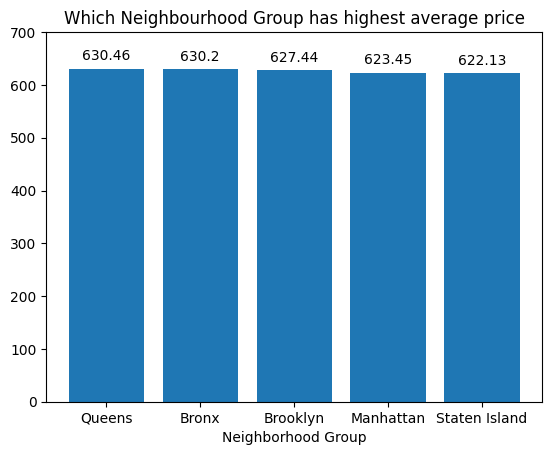

In [102]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"])
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"],2), label_type= 'edge', padding = 4)
plt.ylim([0,700])
plt.xlabel('Neighborhood Group')
plt.ylabel;('Average Price')
plt.title('Which Neighbourhood Group has highest average price')

Text(0.5, 1.0, 'Which Construction Year has highest average price')

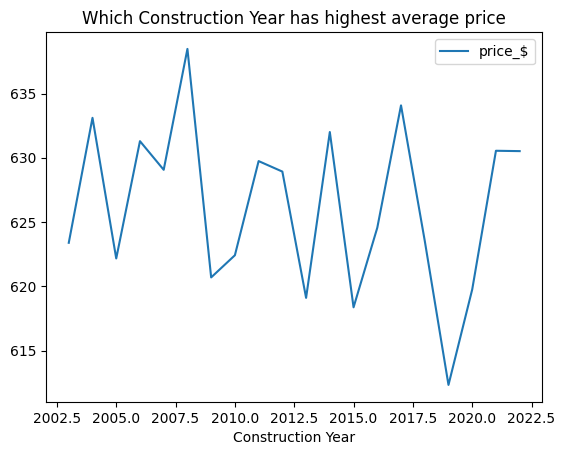

In [104]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel;('Average Price')
plt.title('Which Construction Year has highest average price')

Text(0.5, 1.0, 'Which Host Name has highest number of listings')

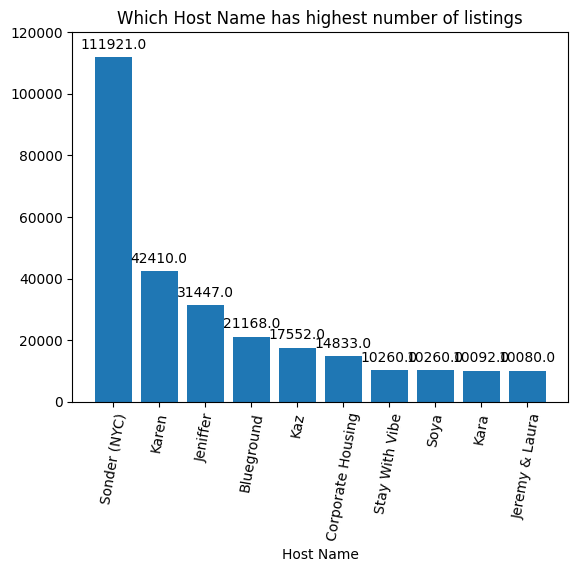

In [111]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"])
plt.bar_label(hosts_bar, labels = hosts.loc[:,"calculated host listings count"],  padding = 4)
plt.xlabel('Host Name')
plt.ylabel;('Calculated host listings count')
plt.xticks(rotation = 80)
plt.ylim([0,120000])
plt.title('Which Host Name has highest number of listings')

In [112]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


Text(0.5, 1.0, 'Which Host Identity Verified has highest review rate number')

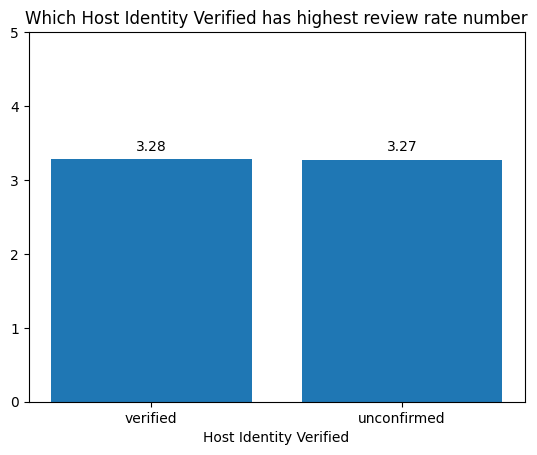

In [113]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"],2), label_type= 'edge', padding = 4)
plt.ylim([0,5])
plt.xlabel('Host Identity Verified')
plt.ylabel;('Review rate number')
plt.title('Which Host Identity Verified has highest review rate number')

Text(0.5, 1.0, 'Which Neighborhood Group has highest price')

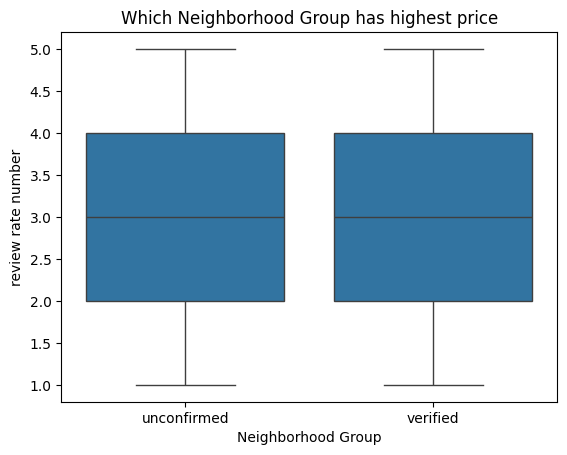

In [114]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x= 'host_identity_verified', y = 'review rate number', color = base_color)
plt.xlabel('Neighborhood Group')
plt.ylabel;('Price')
plt.title('Which Neighborhood Group has highest price')

In [115]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909074778258)

Text(0.5, 1.0, 'Price vs Service Fee')

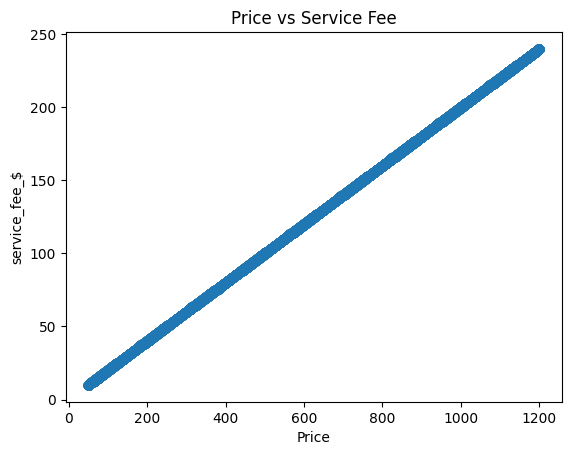

In [116]:
sns.regplot(data = df, x = 'price_$', y = 'service_fee_$')
plt.xlabel('Price')
plt.ylabel;('Service Fee')
plt.title('Price vs Service Fee')

In [117]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Which Neighborhood Group has highest review rate number')

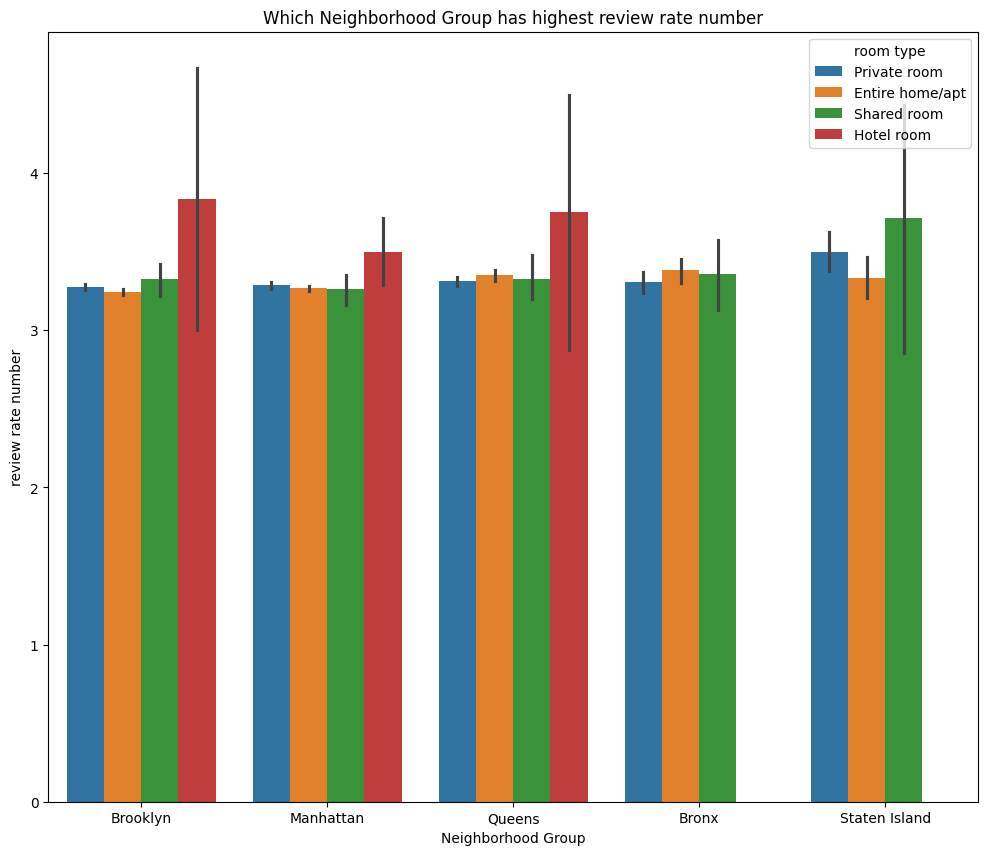

In [118]:
plt.figure(figsize=[12,10])
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighborhood Group')
plt.ylabel;('Review rate number')
plt.title('Which Neighborhood Group has highest review rate number')

Text(0.5, 1.0, 'Availability 365 vs Host listings')

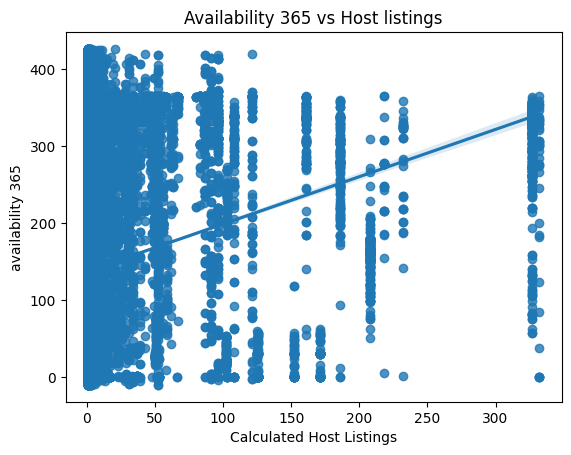

In [120]:
sns.regplot(data = df, x = 'calculated host listings count', y = 'availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel;('Availability 365')
plt.title('Availability 365 vs Host listings')

In [121]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)